In [102]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
# Load data into DataFrames
dim_date = pd.read_csv("C:\\Users\\sarthak.verma\\Downloads\\atiqhotel\\dim_date.csv")
dim_hotels = pd.read_csv("C:\\Users\\sarthak.verma\\Downloads\\atiqhotel\\dim_hotels.csv")
dim_rooms = pd.read_csv("C:\\Users\\sarthak.verma\\Downloads\\atiqhotel\\dim_rooms.csv")
fact_aggregated_bookings = pd.read_csv("C:\\Users\\sarthak.verma\\Downloads\\atiqhotel\\fact_aggregated_bookings.csv")
fact_bookings = pd.read_csv("C:\\Users\\sarthak.verma\\Downloads\\atiqhotel\\fact_bookings.csv")

In [104]:
# Summary status
print(dim_date.describe())
print(dim_hotels.describe())
print(dim_rooms.describe())
print(fact_aggregated_bookings.describe())
print(fact_bookings.describe())

             date  mmm yy week no  day_type
count          92      92      92        92
unique         92       3      14         2
top     01-May-22  May 22    W 19  weekeday
freq            1      31       7        65
       property_id
count        25.00
mean     18,040.64
std       1,122.44
min      16,558.00
25%      17,558.00
50%      17,564.00
75%      18,563.00
max      19,563.00
       room_id room_class
count        4          4
unique       4          4
top        RT1   Standard
freq         1          1
       property_id  successful_bookings  capacity
count     9,200.00             9,200.00  9,200.00
mean     18,040.64                14.63     25.28
std       1,099.82                 7.59     11.44
min      16,558.00                 1.00      3.00
25%      17,558.00                 9.00     18.00
50%      17,564.00                14.00     25.00
75%      18,563.00                19.00     34.00
max      19,563.00                43.00     50.00
       property_id  no_guests

In [105]:
# Top n rows
print(dim_date.head(5))
print(dim_hotels.head(5))
print(dim_rooms.head(5))
print(fact_aggregated_bookings.head(5))
print(fact_bookings.head(5))

        date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
4  05-May-22  May 22    W 19  weekeday
   property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi
  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential
   property_id check_in_date room_category  successful_bookings  capacity
0        16559     01-May-22           RT1                   25        30
1        19562     01-May-22           RT1                   28        30
2        19563     01-May-22           RT1                   23        30
3        17558     01-May-22           RT1                   1

In [106]:
# Bottom n rows
print(dim_date.tail(5))
print(dim_hotels.tail(5))
print(dim_rooms.tail(5))
print(fact_aggregated_bookings.tail(5))
print(fact_bookings.tail(5))

         date  mmm yy week no  day_type
87  27-Jul-22  Jul 22    W 31  weekeday
88  28-Jul-22  Jul 22    W 31  weekeday
89  29-Jul-22  Jul 22    W 31  weekeday
90  30-Jul-22  Jul 22    W 31   weekend
91  31-Jul-22  Jul 22    W 32   weekend
    property_id  property_name  category       city
20        19560     Atliq City  Business  Bangalore
21        19561      Atliq Blu    Luxury  Bangalore
22        19562      Atliq Bay    Luxury  Bangalore
23        19563   Atliq Palace  Business  Bangalore
24        17564  Atliq Seasons  Business     Mumbai
  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential
      property_id check_in_date room_category  successful_bookings  capacity
9195        16563     31-Jul-22           RT4                   13        18
9196        16559     31-Jul-22           RT4                   13        18
9197        17558     31-Jul-22           RT4                    3         6
9198        19563   

In [107]:
# Find the unique values
print(dim_date.nunique())
print(dim_hotels.nunique())
print(dim_rooms.nunique())
print(fact_aggregated_bookings.nunique())
print(fact_bookings.nunique())

date        92
mmm yy       3
week no     14
day_type     2
dtype: int64
property_id      25
property_name     7
category          2
city              4
dtype: int64
room_id       4
room_class    4
dtype: int64
property_id            25
check_in_date          92
room_category           4
successful_bookings    42
capacity               38
dtype: int64
booking_id           134590
property_id              25
booking_date            116
check_in_date            92
checkout_date            97
no_guests                 6
room_category             4
booking_platform          7
ratings_given             5
booking_status            3
revenue_generated        62
revenue_realized        124
dtype: int64


In [108]:
# Checking missing values (NaN)
print(dim_date.isnull().sum())
print(dim_hotels.isnull().sum())
print(dim_rooms.isnull().sum())
print(fact_aggregated_bookings.isnull().sum())
print(fact_bookings.isnull().sum())

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64
property_id      0
property_name    0
category         0
city             0
dtype: int64
room_id       0
room_class    0
dtype: int64
property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64
booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


In [109]:
# Fill missing values in the 'ratings_given' column with a new category
fact_bookings['ratings_given'].fillna('Not provided', inplace=True)

In [110]:
# Checking if the missing values are still there or not
print(fact_bookings.isnull().sum())

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64


In [111]:
# Convert date columns to consistent format in fact_aggregated_bookings
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])

# Convert date column to consistent format in dim_date
dim_date['date'] = pd.to_datetime(dim_date['date'])

# Convert date columns to consistent format in fact_bookings
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])

# Saving the modified fact_bookings DataFrame
#fact_bookings.to_csv("fact_bookings_updated.csv", index=False)

In [112]:
print(fact_aggregated_bookings.head(7))
print(dim_date.head(7))
print(fact_bookings.head(10))

   property_id check_in_date room_category  successful_bookings  capacity
0        16559    2022-05-01           RT1                   25        30
1        19562    2022-05-01           RT1                   28        30
2        19563    2022-05-01           RT1                   23        30
3        17558    2022-05-01           RT1                   13        19
4        16558    2022-05-01           RT1                   18        19
5        17560    2022-05-01           RT1                   28        40
6        19558    2022-05-01           RT1                   25        40
        date  mmm yy week no  day_type
0 2022-05-01  May 22    W 19   weekend
1 2022-05-02  May 22    W 19  weekeday
2 2022-05-03  May 22    W 19  weekeday
3 2022-05-04  May 22    W 19  weekeday
4 2022-05-05  May 22    W 19  weekeday
5 2022-05-06  May 22    W 19  weekeday
6 2022-05-07  May 22    W 19   weekend
          booking_id  property_id booking_date check_in_date checkout_date  \
0   May012216558RT

In [113]:
# Checking for duplicates in each DataFrame
print("Duplicates check before treatment:")
print("Dimension Date:")
print(dim_date[dim_date.duplicated()])
print("\nDimension Hotels:")
print(dim_hotels[dim_hotels.duplicated()])
print("\nDimension Rooms:")
print(dim_rooms[dim_rooms.duplicated()])
print("\nFact Aggregated Bookings:")
print(fact_aggregated_bookings[fact_aggregated_bookings.duplicated()])
print("\nFact Bookings:")
print(fact_bookings[fact_bookings.duplicated()])

Duplicates check before treatment:
Dimension Date:
Empty DataFrame
Columns: [date, mmm yy, week no, day_type]
Index: []

Dimension Hotels:
Empty DataFrame
Columns: [property_id, property_name, category, city]
Index: []

Dimension Rooms:
Empty DataFrame
Columns: [room_id, room_class]
Index: []

Fact Aggregated Bookings:
Empty DataFrame
Columns: [property_id, check_in_date, room_category, successful_bookings, capacity]
Index: []

Fact Bookings:
Empty DataFrame
Columns: [booking_id, property_id, booking_date, check_in_date, checkout_date, no_guests, room_category, booking_platform, ratings_given, booking_status, revenue_generated, revenue_realized]
Index: []


In [114]:
# Perform joins
# Join fact_aggregated_bookings with dim_date
merged_data = pd.merge(fact_aggregated_bookings, dim_date, left_on='check_in_date', right_on='date', how='left')

# Join the result with dim_hotels
merged_data = pd.merge(merged_data, dim_hotels, on='property_id', how='left')

# Join the result with dim_rooms
merged_data = pd.merge(merged_data, dim_rooms, left_on='room_category', right_on='room_id', how='left')

# Join with fact_bookings using common columns
hotel_data = pd.merge(merged_data, fact_bookings, on=['property_id', 'check_in_date', 'room_category'], how='left')


In [115]:
hotel_data.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,date,mmm yy,week no,day_type,property_name,...,room_class,booking_id,booking_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16559,2022-05-01,RT1,25,30,2022-05-01,May 22,W 19,weekend,Atliq Exotica,...,Standard,May012216559RT11,2022-04-28,2022-05-03,2,journey,3.00,Checked Out,11050,11050
1,16559,2022-05-01,RT1,25,30,2022-05-01,May 22,W 19,weekend,Atliq Exotica,...,Standard,May012216559RT12,2022-04-29,2022-05-06,2,makeyourtrip,5.00,Checked Out,11050,11050
2,16559,2022-05-01,RT1,25,30,2022-05-01,May 22,W 19,weekend,Atliq Exotica,...,Standard,May012216559RT13,2022-04-27,2022-05-02,1,tripster,Not provided,Cancelled,11050,4420
3,16559,2022-05-01,RT1,25,30,2022-05-01,May 22,W 19,weekend,Atliq Exotica,...,Standard,May012216559RT14,2022-04-29,2022-05-03,3,direct offline,5.00,Checked Out,12155,12155
4,16559,2022-05-01,RT1,25,30,2022-05-01,May 22,W 19,weekend,Atliq Exotica,...,Standard,May012216559RT15,2022-04-29,2022-05-02,3,others,5.00,Checked Out,12155,12155


In [116]:
# Assuming hotel_data is your DataFrame

# Numerical columns
numerical_columns = hotel_data.select_dtypes(include=np.number).columns.tolist()
print("Numerical Columns:", numerical_columns)

# Categorical columns
categorical_columns = hotel_data.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['property_id', 'successful_bookings', 'capacity', 'no_guests', 'revenue_generated', 'revenue_realized']
Categorical Columns: ['room_category', 'mmm yy', 'week no', 'day_type', 'property_name', 'category', 'city', 'room_id', 'room_class', 'booking_id', 'booking_platform', 'ratings_given', 'booking_status']


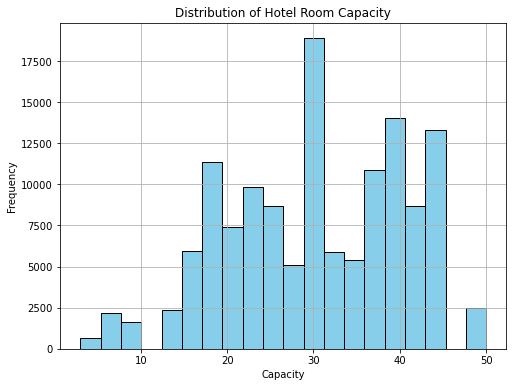

In [117]:
# Analyzing Capacity
plt.figure(figsize=(8, 6))
plt.hist(hotel_data['capacity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Hotel Room Capacity')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



Room Capacity Distribution:
- The hotel chain has a significant number of rooms with a capacity of around 30 guests, indicating a focus on larger rooms or 
  suites.
- There is also a notable portion of rooms with smaller capacities (around 10-20 guests), suggesting a range of room types to 
  cater to different guest preferences.


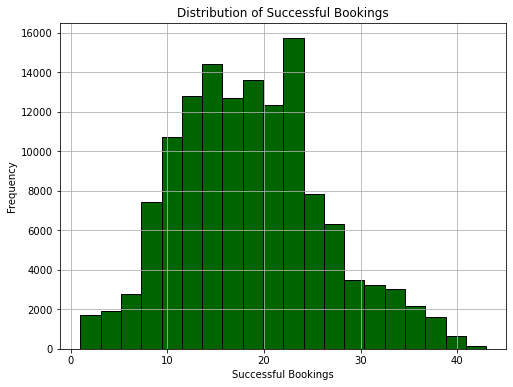

In [118]:
# Analyzing Successful Bookings
plt.figure(figsize=(8, 6))
plt.hist(hotel_data['successful_bookings'], bins=20, color='darkgreen', edgecolor='black')
plt.title('Distribution of Successful Bookings')
plt.xlabel('Successful Bookings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Successful Bookings Distribution:
- The distribution of successful bookings follows a pyramid-like pattern, with the highest frequency of bookings for rooms 
  accommodating around 10-15 guests.
- This insight aligns with the goal of regaining market share and revenue, as it suggests a potential mismatch between room 
  capacity and customer demand, requiring strategic adjustments.

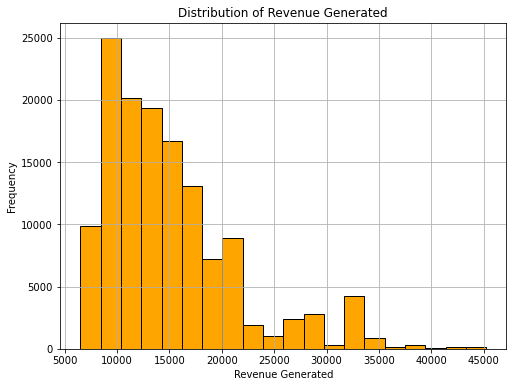

In [119]:
# Analyzing Revenue Generated
plt.figure(figsize=(8, 6))
plt.hist(hotel_data['revenue_generated'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Revenue Generated Distribution:
- The distribution shows a skewed pattern, with a significant portion of revenue generated from lower-priced bookings or room 
  categories.
- There is a noticeable drop-off in the frequency of higher revenue bookings, indicating potential opportunities for 
  optimization or targeted marketing strategies.

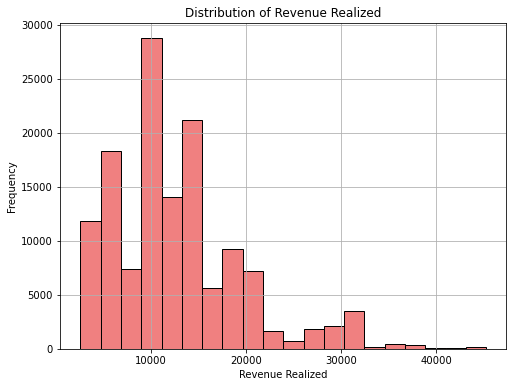

In [120]:
# Analyzing Revenue Realized
plt.figure(figsize=(8, 6))
plt.hist(hotel_data['revenue_realized'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Revenue Realized')
plt.xlabel('Revenue Realized')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Revenue Realized Distribution:
- The distribution of revenue realized exhibits a similar pattern to revenue generated, further highlighting the concentration 
  of bookings and revenue in the lower to mid-range categories.
- However, there is a smaller peak at the higher revenue range, suggesting a potential niche market or premium segment to 
  explore.

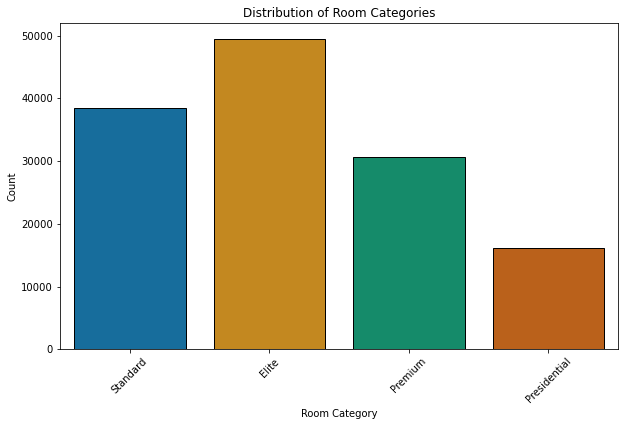

In [121]:
# Analyzing Room Category - Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='room_class', data=hotel_data, palette='colorblind', edgecolor='black')
plt.title('Distribution of Room Categories')
plt.xlabel('Room Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Room Categories Distribution:
- The "Elite" room category accounts for the largest portion, followed by "Premium" and "Standard" categories.
- The "Presidential" category appears to be the smallest, potentially indicating an opportunity for expansion or targeted 
  marketing efforts in the ultra-luxury segment.

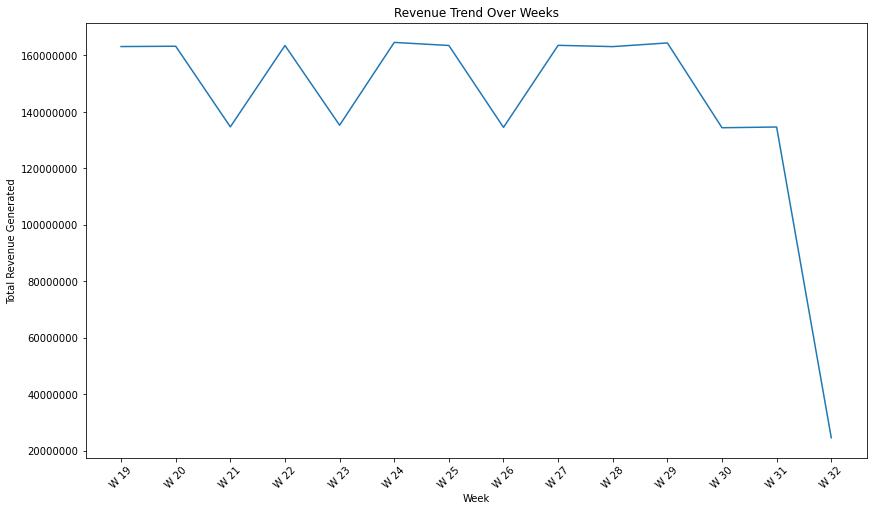

In [122]:
# Revenue Trend Over weeks
# Get all unique week numbers
all_weeks = hotel_data['week no'].unique()

# Group by 'week no' and calculate total revenue generated
revenue_by_week = hotel_data.groupby('week no')['revenue_generated'].sum()

# Reindex the series to include all weeks
revenue_by_week = revenue_by_week.reindex(all_weeks, fill_value=0)

# Plot the time series
plt.figure(figsize=(14, 8))
plt.plot(revenue_by_week.index, revenue_by_week.values)
plt.title('Revenue Trend Over Weeks')
plt.xlabel('Week')
plt.ylabel('Total Revenue Generated')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


 Revenue Trend:
- The overall revenue trend shows a cyclical pattern with peaks and troughs over the weeks, indicating seasonal fluctuations.
- However, there is a significant drop in revenue towards the end, suggesting a concerning decline that needs to be addressed.


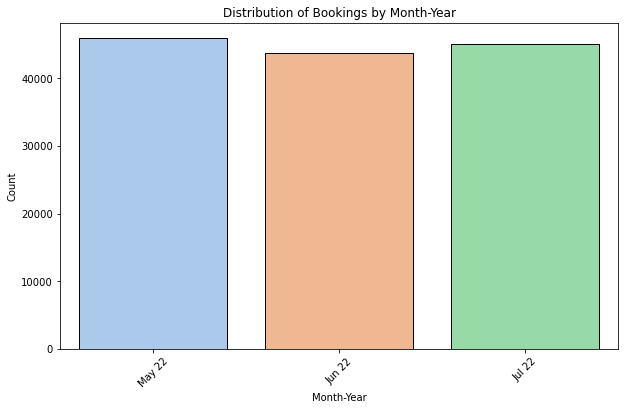

In [123]:
# Analyzing Month-Year (mmm yy) - Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='mmm yy', data=hotel_data, palette='pastel', edgecolor='black')
plt.title('Distribution of Bookings by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Bookings by Month-Year:
- The chart shows a clear increase in bookings from Jun 2022 to July 2022, indicating a peak season that should be capitalized 
  on.
- But there is overall decrease in the booking if we see from May 2022.

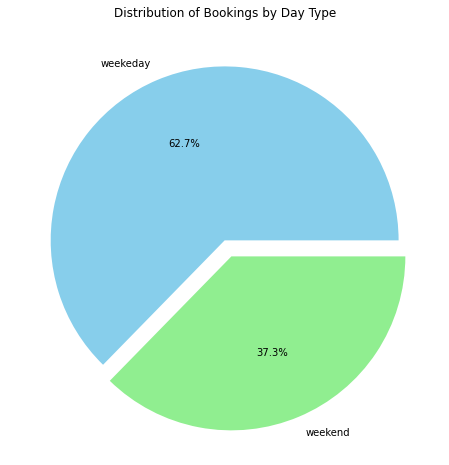

In [124]:
# Analyzing Day Type - Pie Chart
plt.figure(figsize=(8, 8))
hotel_data['day_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], explode=(0, 0.1))
plt.title('Distribution of Bookings by Day Type')
plt.ylabel('')
plt.show()

Bookings by Day Type:
- A majority of bookings (62.7%) occur during weekdays, suggesting a focus on business travelers or corporate clients.
- Efforts should be made to boost weekend bookings (37.3%) to cater to leisure travelers as well.


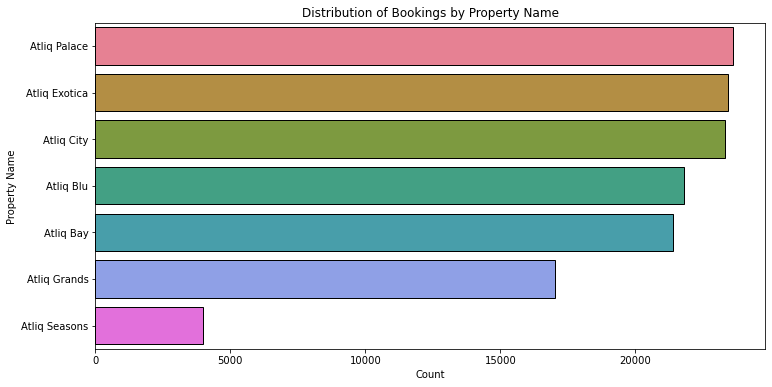

In [125]:
# Analyzing Property Name - Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(y='property_name', data=hotel_data, palette='husl', order=hotel_data['property_name'].value_counts().index, edgecolor = 'black')
plt.title('Distribution of Bookings by Property Name')
plt.xlabel('Count')
plt.ylabel('Property Name')
plt.show()

Bookings by Property Name:
- Attiq Palace has the highest number of bookings, indicating its popularity and potential for revenue generation.
- Attiq Seasons has the lowest bookings, suggesting the need for marketing efforts or improvements to attract more guests.

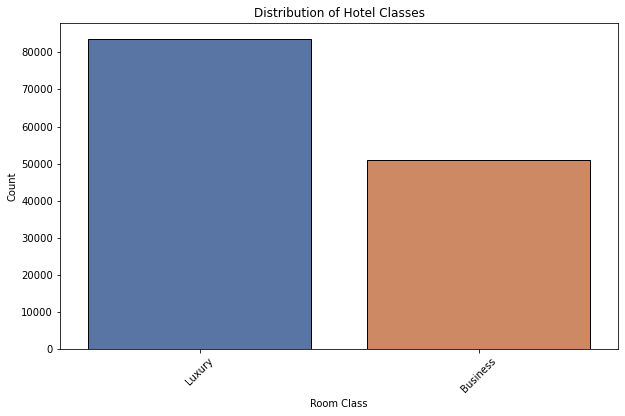

In [126]:
# Analyzing Hotel Class - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=hotel_data, palette='deep', edgecolor = 'black')
plt.title('Distribution of Hotel Classes')
plt.xlabel('Room Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Hotel Classes:
- The majority of bookings are for the "Luxury" class hotels, aligning with Atliq Grands' focus on the luxury/business hotel 
  category.
- However, there is a significant number of bookings for "Business" class hotels, indicating a potential untapped market 
  segment.


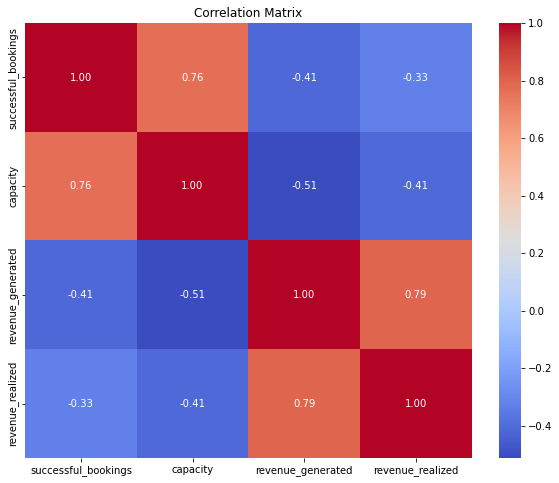

In [127]:
# Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = hotel_data[['successful_bookings', 'capacity', 'revenue_generated', 'revenue_realized']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Correlation Analysis:
- There is a strong positive correlation (0.79) between revenue generated and revenue realized, indicating efficient revenue 
  realization processes.
- Successful bookings have a moderate positive correlation (0.76) with capacity, suggesting that increasing capacity could 
  potentially lead to more bookings.
- However, successful bookings have a negative correlation (-0.41 and -0.33) with revenue metrics, implying that certain booking 
  types may not contribute significantly to revenue generation.


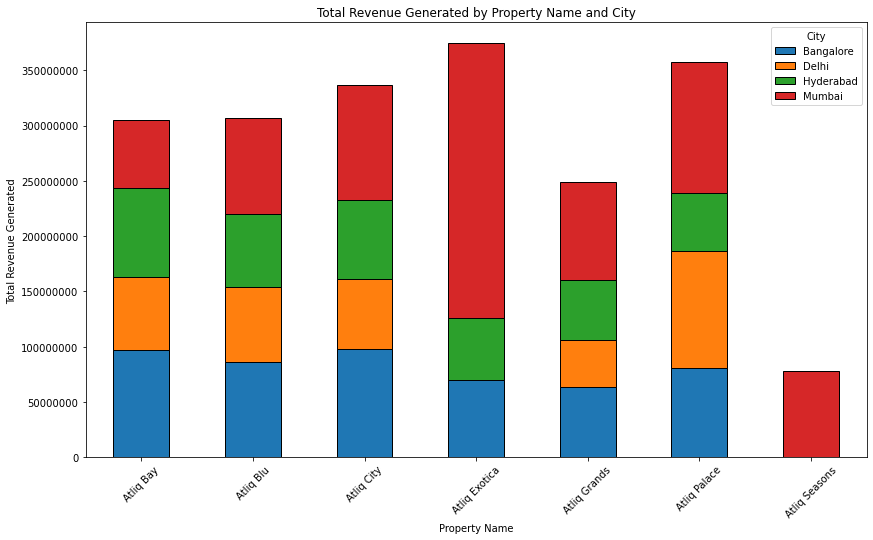

In [128]:
# Segmentation Analysis
# Group by property name and city, then calculate total revenue generated
revenue_by_property_city = hotel_data.groupby(['property_name', 'city'])['revenue_generated'].sum().unstack()


# Plot the data with black edge color
ax = revenue_by_property_city.plot(kind='bar', stacked=True, figsize=(14, 8), edgecolor='black')
plt.title('Total Revenue Generated by Property Name and City')
plt.xlabel('Property Name')
plt.ylabel('Total Revenue Generated')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
plt.legend(title='City')
plt.xticks(rotation=45)
plt.show()


Revenue Distribution:
   - Mumbai properties generate the highest revenue, followed by Delhi, suggesting higher demand or pricing in these metro 
     cities.
   - Hyderabad properties also contribute significantly to the overall revenue, indicating potential growth opportunities in 
     this market.
   - The "Atliq Exotica" property seems to be the top revenue generator, possibly due to its premium positioning or higher 
     occupancy rates.


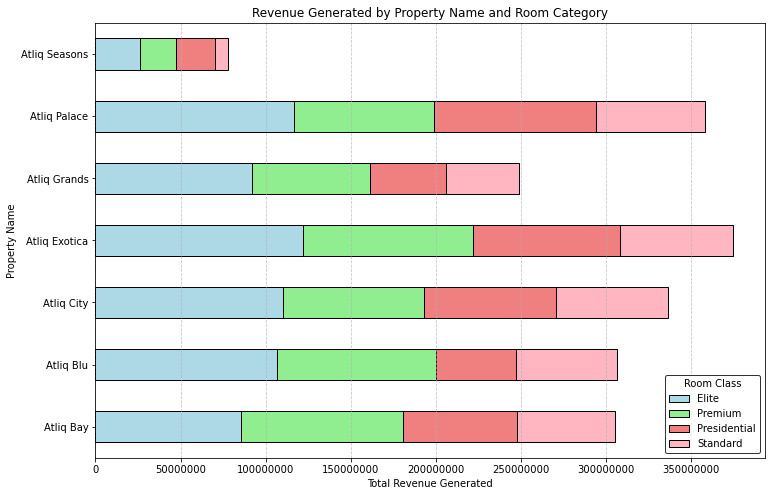

In [129]:
# Plot a horizontal stacked bar chart for revenue generated by property name and room class
revenue_by_property_room = hotel_data.groupby(['property_name', 'room_class'])['revenue_generated'].sum().unstack()
revenue_by_property_room.plot(kind='barh', stacked=True, figsize=(12, 8), edgecolor='black', color=['lightblue', 'lightgreen', 'lightcoral', 'lightpink'])

plt.title('Revenue Generated by Property Name and Room Category')
plt.xlabel('Total Revenue Generated')
plt.ylabel('Property Name')
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation for x-axis
plt.legend(title='Room Class', edgecolor='black')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add gridlines on x-axis
plt.show()


Revenue by Room Category:
   - The "Presidential" room category generates the highest revenue across all properties, indicating a strong demand for luxury 
     accommodations.
   - "Elite" and "Premium" room categories also contribute substantially to revenue, highlighting the importance of offering 
     diverse room types.
   - The "Atliq Seasons" property appears to have a limited room category mix, which could be an area for potential expansion.

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


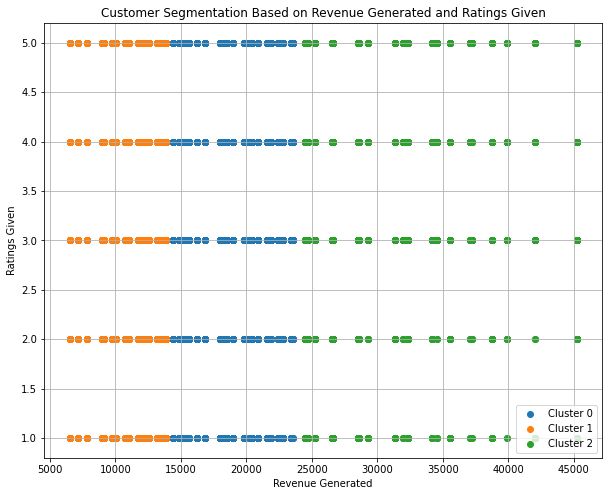

In [130]:
from sklearn.cluster import KMeans

# Prepare the data
customer_data = hotel_data[['revenue_generated', 'ratings_given']].dropna()

# Exclude rows with "Not provided" in either column
customer_data = customer_data[~customer_data.isin(['Not provided'])].dropna()

# Choose the number of clusters
num_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data)

# Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster_num in range(num_clusters):
    cluster_data = customer_data[customer_data['cluster'] == cluster_num]
    plt.scatter(cluster_data['revenue_generated'], cluster_data['ratings_given'], label=f'Cluster {cluster_num}')

plt.title('Customer Segmentation Based on Revenue Generated and Ratings Given')
plt.xlabel('Revenue Generated')
plt.ylabel('Ratings Given')
plt.legend()
plt.grid(True)
plt.show()


Customer Segmentation:
   - There appears to be a clear distinction between three customer clusters based on revenue generated and ratings given.
   - Cluster 2 (green) seems to represent high-revenue, high-rating customers, likely the most valuable segment.
   - Cluster 1 (orange) represents moderate revenue and ratings, potentially indicating room for improvement in customer 
     experience or pricing strategies.
   - Cluster 0 (blue) consists of lower revenue and rating customers, suggesting the need for targeted marketing or service 
     enhancements.

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming hotel_data is already loaded and preprocessed as needed

# Prepare the data
X = hotel_data[['room_category', 'booking_platform', 'capacity', 'successful_bookings']]
y = hotel_data['revenue_generated']

# Extract unique categories from the training data
room_category_unique = hotel_data['room_category'].unique()
booking_platform_unique = hotel_data['booking_platform'].unique()

# One-hot encode categorical variables with known categories and handle unknown categories
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(categories=[room_category_unique, booking_platform_unique], handle_unknown='ignore'), ['room_category', 'booking_platform'])
], remainder='passthrough')

# Create a pipeline with a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
print(f"Model R^2 Score: {pipeline.score(X_test, y_test):.2f}")


Model R^2 Score: 0.72


In [132]:
# Example Prediction
# Sample new data points
new_data = pd.DataFrame({
    'room_category': ['RT1', 'RT3'],
    'booking_platform': ['Online', 'Offline'],
    'capacity': [10, 15],
    'successful_bookings': [8, 12]
})

# Make predictions
predicted_revenue = pipeline.predict(new_data)

# Display predictions
new_data['predicted_revenue'] = predicted_revenue

# Set display format for floating-point numbers
pd.options.display.float_format = '{:,.2f}'.format

print(new_data)


  room_category booking_platform  capacity  successful_bookings  \
0           RT1           Online        10                    8   
1           RT3          Offline        15                   12   

   predicted_revenue  
0 161,292,843,929.98  
1 161,292,852,118.44  


Overall Summary and Important Insights:

Atliq Grands, a luxury hotel chain, is facing a decline in market share and revenue in the luxury/business hotel category due to competition and ineffective decision-making. The provided insights reveal several key factors contributing to this situation:

1. Room Capacity and Demand Mismatch: The hotel chain has a significant number of rooms with larger capacities (around 30 guests), while the highest frequency of successful bookings is for rooms accommodating 10-15 guests. This suggests a potential mismatch between room capacity and customer demand, which could lead to inefficient resource allocation and revenue loss.

2. Revenue Concentration in Lower-Priced Segments: The distribution of revenue generated and realized shows a skewed pattern, with a significant portion coming from lower-priced bookings or room categories. This indicates a potential opportunity to optimize pricing strategies and target higher-revenue segments more effectively.

3. Seasonal Fluctuations and Recent Revenue Decline: The revenue trend exhibits a cyclical pattern with peaks and troughs, indicating seasonal fluctuations. However, there is a significant drop in revenue towards the end, which is concerning and needs to be addressed.

4. Property Performance Disparities: Certain properties, such as Attiq Palace, have higher bookings and generate more revenue compared to others like Attiq Seasons. This highlights the need for targeted marketing efforts and operational improvements for underperforming properties.

5. Untapped Market Segments: While the majority of bookings are for the "Luxury" hotel class, there is a significant number of bookings for "Business" class hotels, suggesting an untapped market segment that could be explored.

6. Customer Segmentation Opportunities: The customer segmentation analysis reveals three distinct clusters based on revenue generated and ratings given. This presents an opportunity to tailor strategies for each segment, focusing on enhancing customer experience and pricing strategies for the moderate-revenue segment.


Key Metrics and Factors Influencing Market Share and Revenue Loss:

1. Room Capacity and Demand Mismatch: The mismatch between room capacity and customer demand could lead to inefficient resource allocation, resulting in revenue loss and decreased market share.
2. Revenue Concentration in Lower-Priced Segments: Over-reliance on revenue from lower-priced bookings or room categories may limit profitability and hinder the ability to compete effectively in the luxury/business hotel category.
3. Recent Revenue Decline: The significant drop in revenue towards the end of the analysis period is a concerning factor that could indicate a loss of market share if not addressed promptly.
4. Property Performance Disparities: Underperforming properties with lower bookings and revenue generation could negatively impact the overall market share and revenue for the hotel chain.
5. Untapped Market Segments: Failing to capitalize on potential market segments, such as the "Business" hotel class, could result in missed opportunities for growth and revenue generation.
6. Customer Experience and Satisfaction: The customer segmentation analysis suggests that improvements in customer experience and satisfaction, particularly for the moderate-revenue segment, could help regain market share and revenue.


Strategies to Regain Market Share and Revenue:

Based on the insights and identified factors, Atliq Grands could consider the following strategies to regain their market share and revenue in the luxury/business hotel category:

1. Room Capacity Optimization: Evaluate room capacity and demand patterns to better align room types and sizes with customer preferences, ensuring more efficient resource allocation and revenue generation.

2. Pricing Strategy Optimization: Review pricing strategies and consider adjustments to target higher-revenue segments more effectively, while maintaining a balanced mix of room categories to cater to diverse customer needs.

3. Peak Season Capitalization: Leverage data-driven insights to identify peak seasons and tailor marketing campaigns, promotions, and operational strategies to maximize bookings and revenue during these periods.

4. Targeted Marketing and Property Improvements: Implement targeted marketing efforts and operational improvements for underperforming properties, such as Attiq Seasons, to boost their bookings and revenue contribution.

5. Expansion into Untapped Market Segments: Explore opportunities in untapped market segments, such as the "Business" hotel class, by adapting offerings, pricing strategies, and marketing campaigns to cater to these potential customers.

56. Customer Experience Enhancement: Prioritize enhancing customer experience, particularly for the moderate-revenue segment, through service improvements, amenity upgrades, and personalized offerings to improve customer satisfaction, ratings, and ultimately, market share and revenue.

7. Market and Competitor Analysis: Conduct in-depth market and competitor analysis to identify emerging trends, customer preferences, and competitive strategies, enabling proactive decision-making and differentiation in the luxury/business hotel category.

By implementing these data-driven strategies, Atliq Grands can address the identified challenges, capitalize on opportunities, and regain their market share and revenue in the highly competitive luxury/business hotel category.

In [133]:
output_file_path = "C:\\Users\\sarthak.verma\\Downloads\\Hotel_Data.csv"
hotel_data.to_csv(output_file_path, index = False)